In [1]:
# importing libarieries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
# Reading the data 
df = pd.read_csv('mushrooms.csv')
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [3]:
# Check the shape
df.shape

(8124, 23)

In [4]:
# Checking the missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# Checkng thr dtypes
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

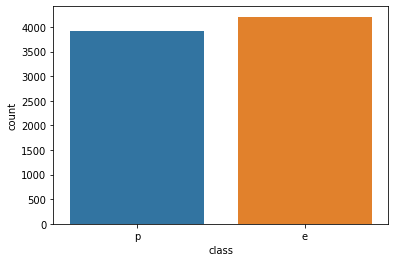

In [6]:
# We want to see if there is an equal number of poisonous and edible mushrooms in the data set
x = df['class']
ax = sns.countplot(x=x ,data = df)

'''
It seems to be fairly balanced dataset with equal number of poisonous and edible mushroom
'''

### let's see how features affect target instead of doing it manually for one features let's do with help of helper function

In [22]:
def plot_data(hue , data):
    for i,col in enumerate(df.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.countplot(x=df[col],hue=hue,data=df)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


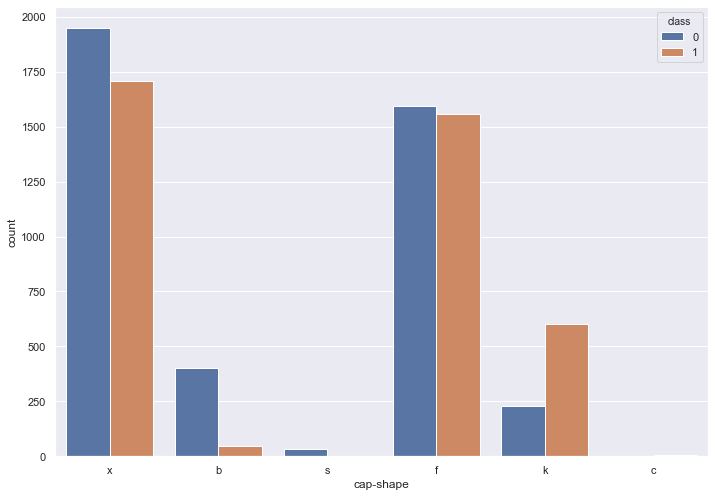

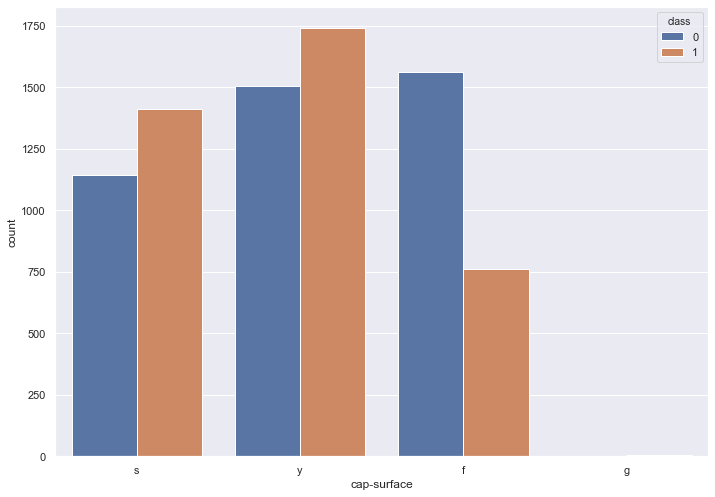

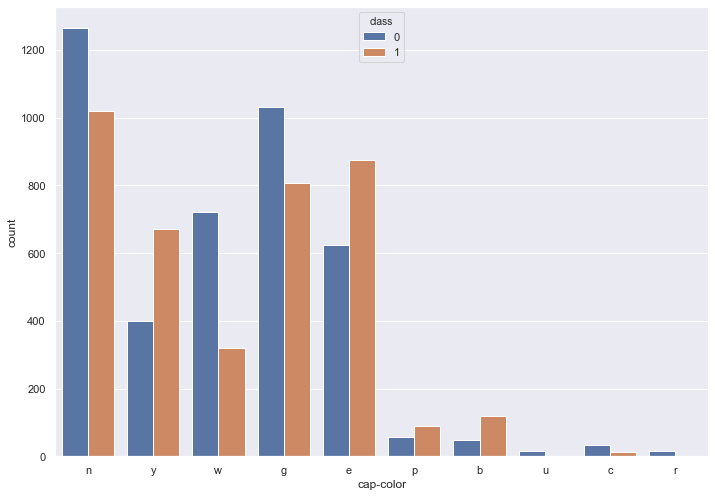

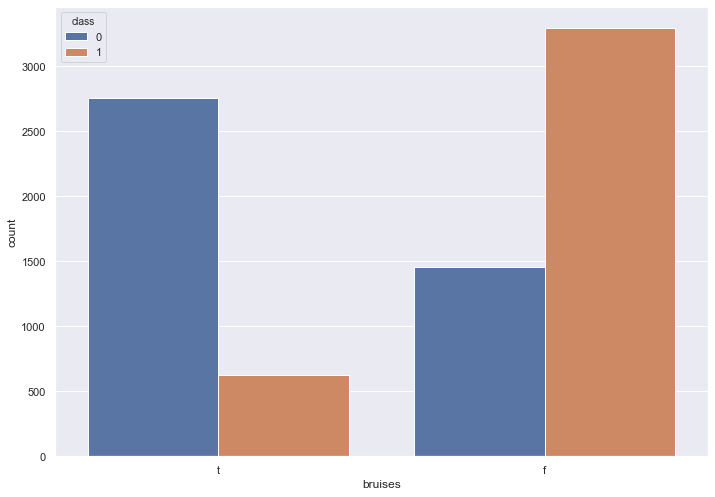

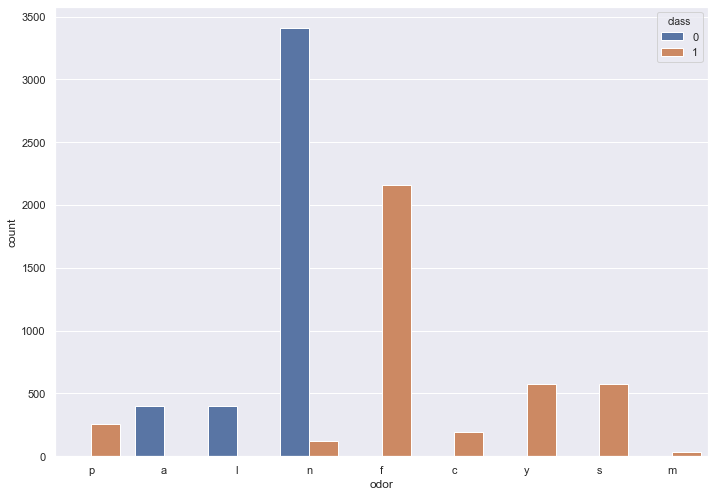

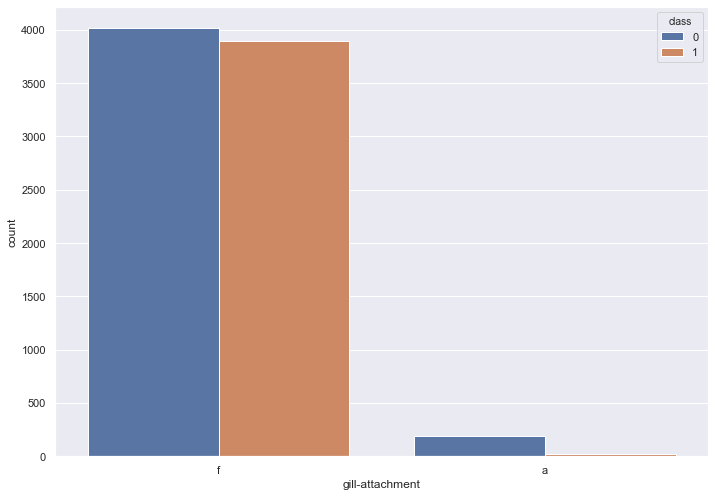

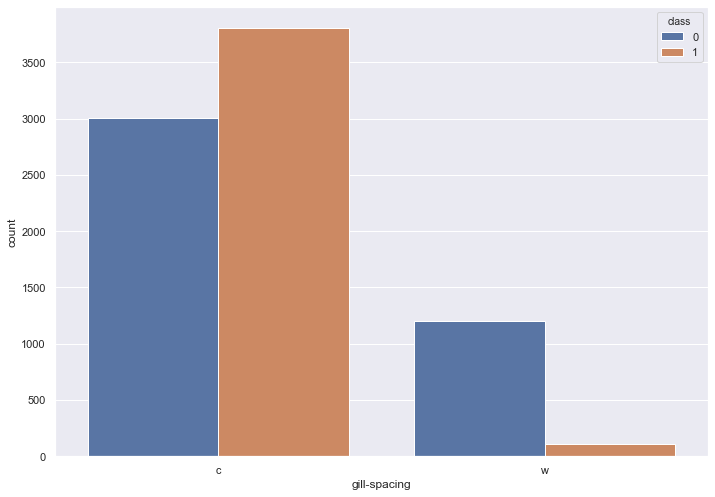

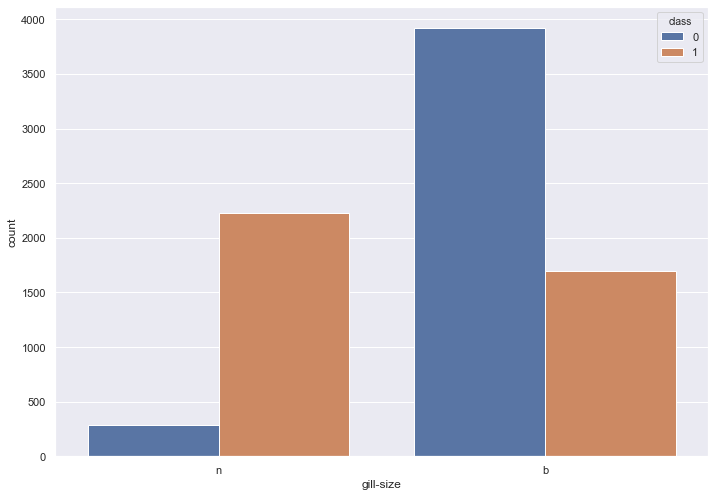

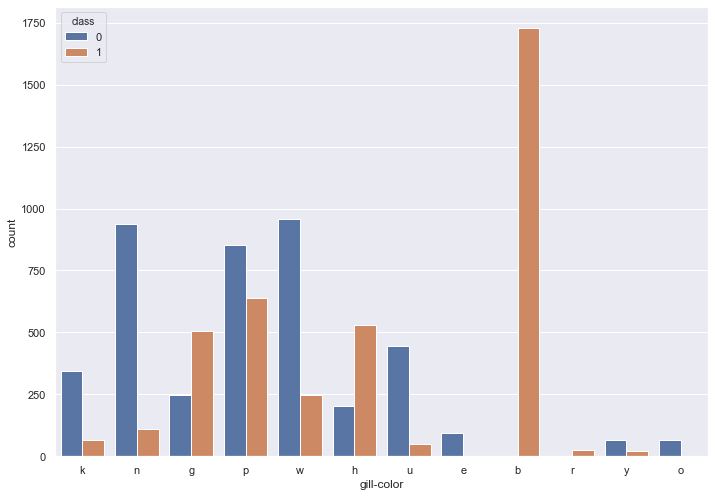

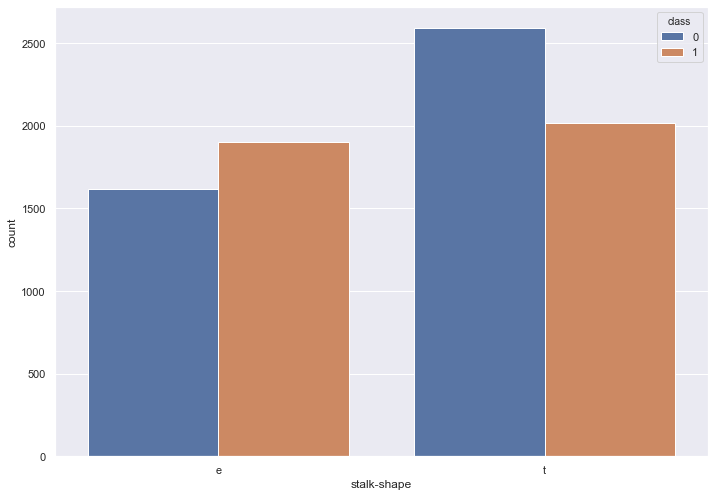

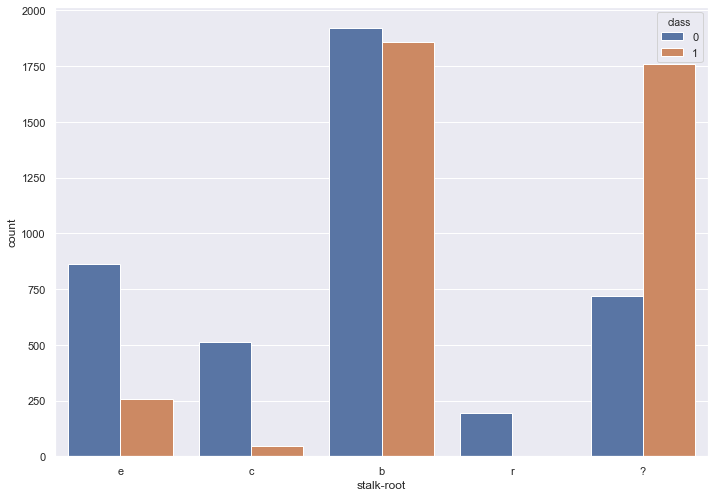

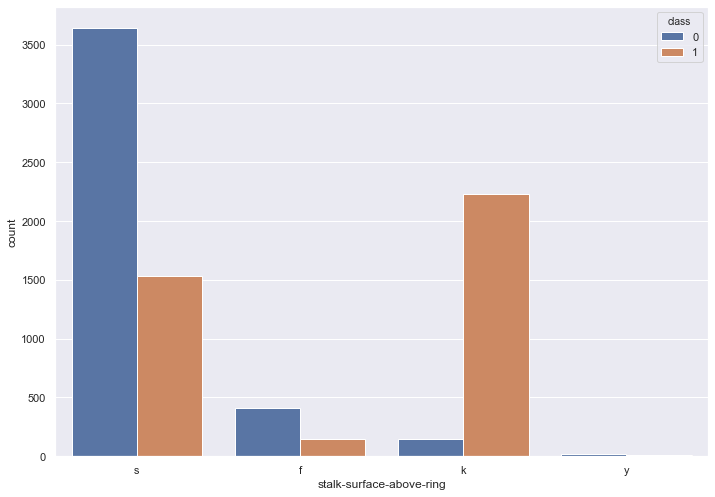

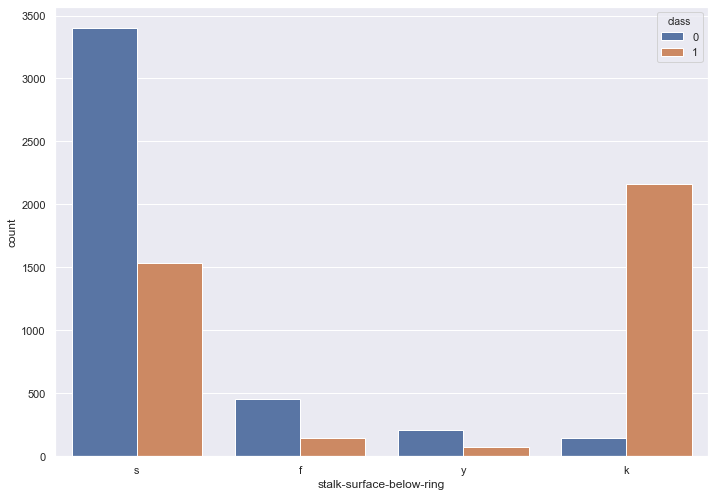

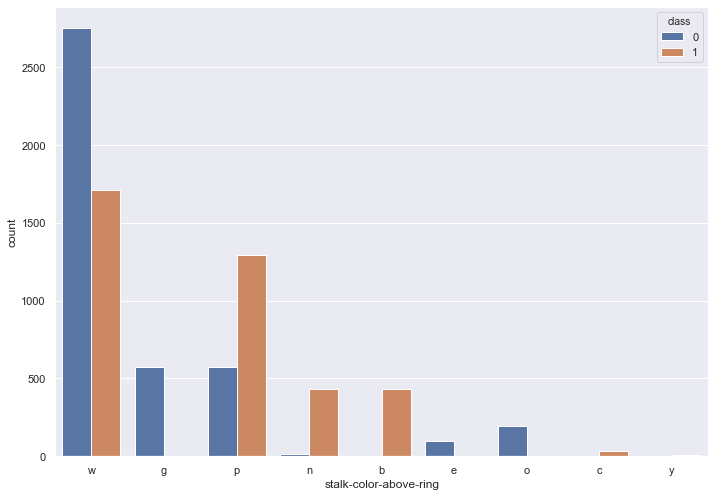

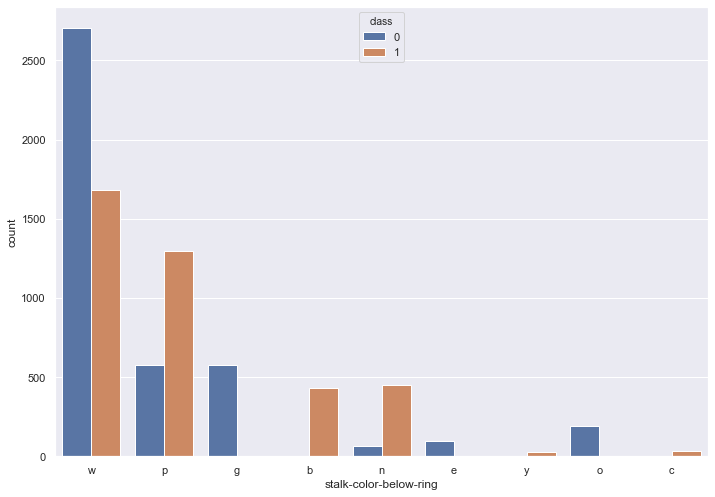

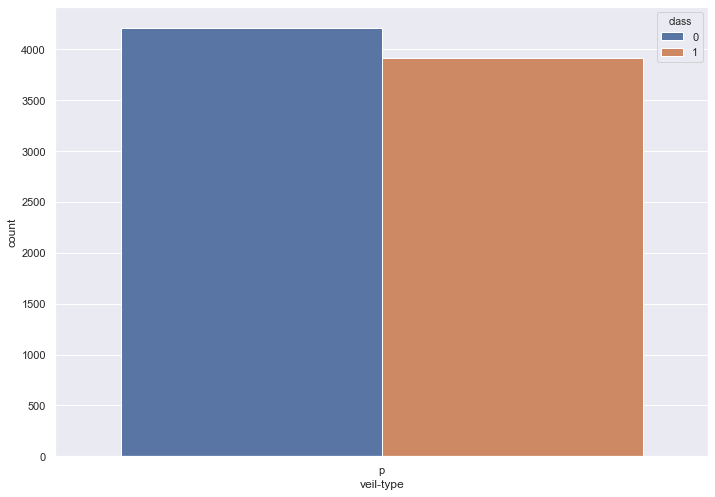

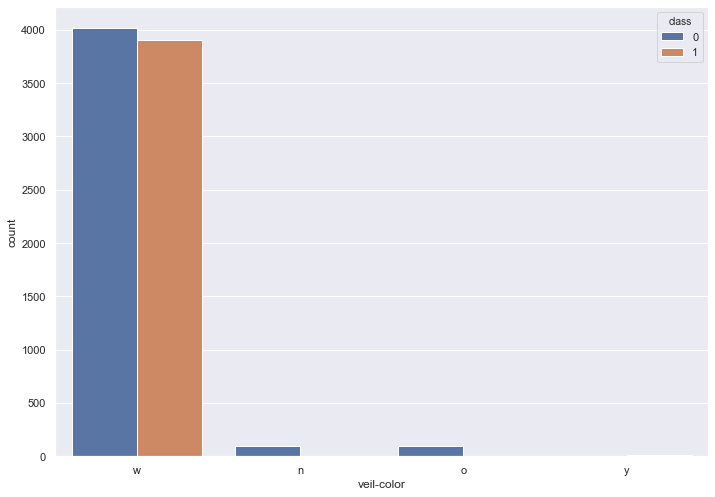

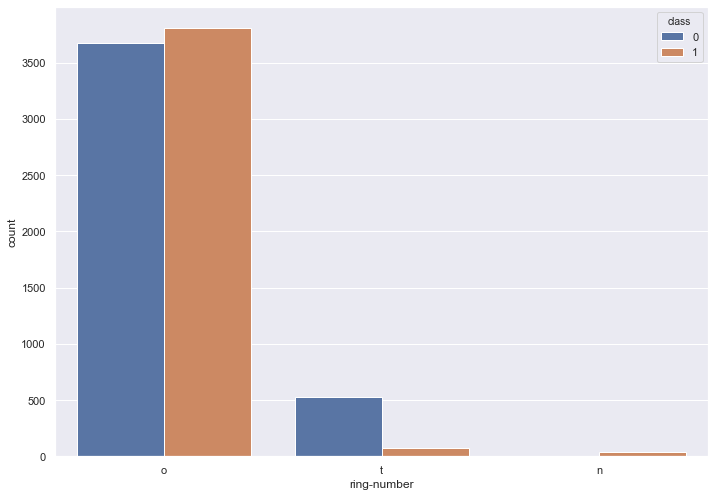

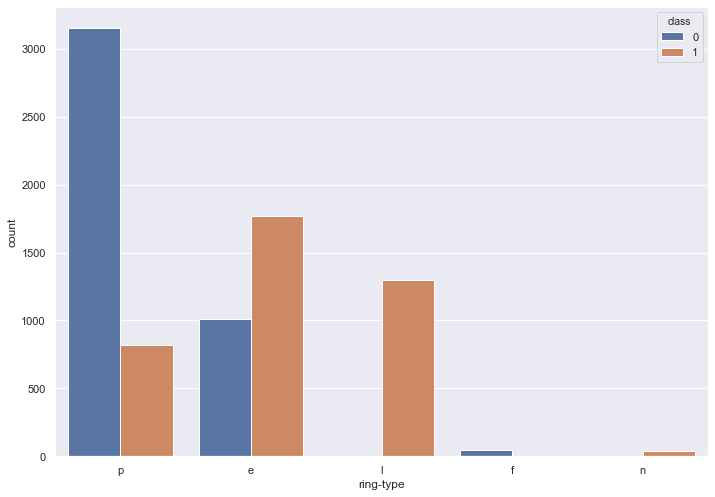

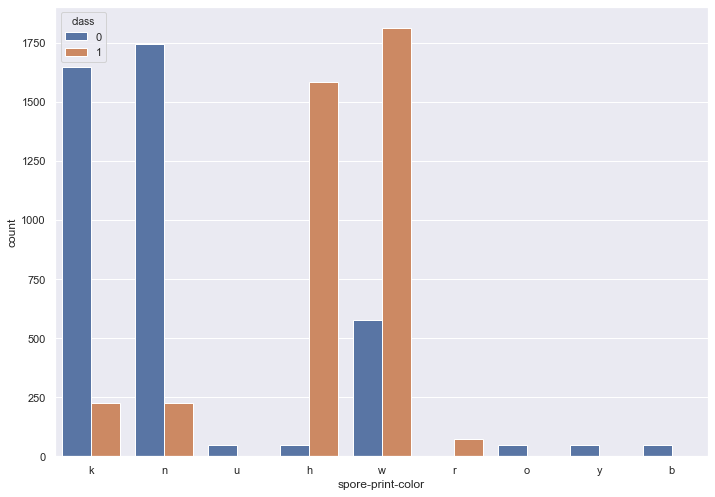

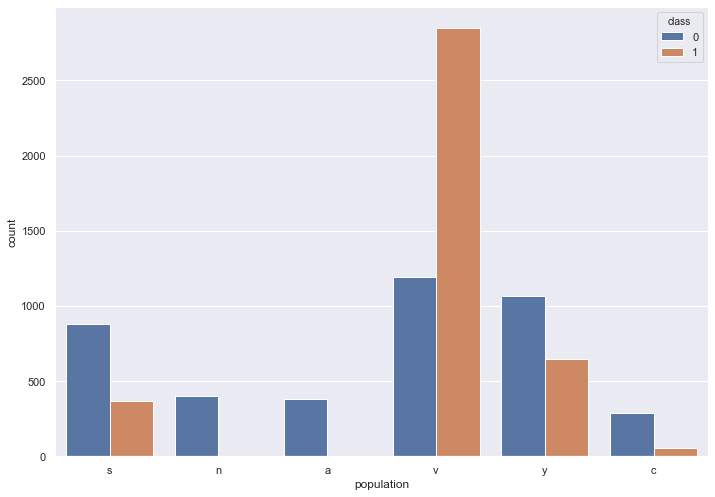

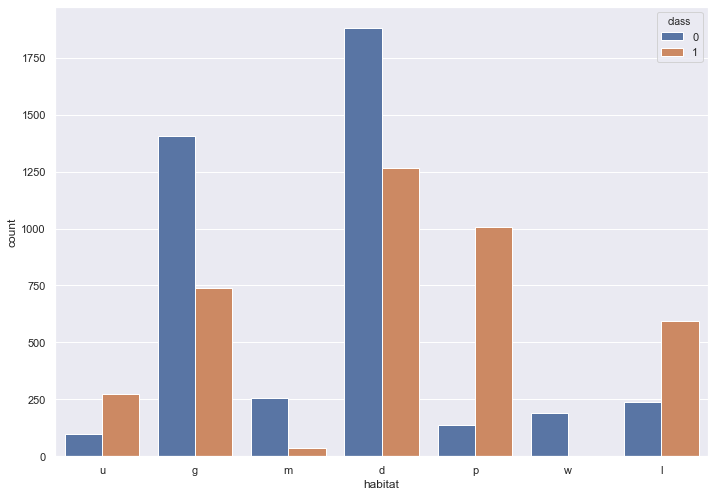

In [23]:
hue = df['class']
data_for_plot = df.drop('class',1)
plot_df(hue,data_for_plot)

In [24]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Modelling 

#### As we know all features are in letters format - so to convert letter into numbers we have to use 'LABEL ENCODING' & 'ONE-HOT ENCODING'

In [25]:
# Lable Encoding 
le = LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

'''
Finally we have converted class columns in form of 1 or 0. Now easily predictable , so posinuse is represented as '1'and edible as '0'. 
'''

In [26]:
encoded_data = pd.get_dummies(df)
encoded_data.head()

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      1            0            0            0            0            0   
1      0            0            0            0            0            0   
2      0            1            0            0            0            0   
3      1            0            0            0            0            0   
4      0            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0            1              0              0              1  ...   
1            1              0              0              1  ...   
2            0              0              0              1  ...   
3            1              0              0              0  ...   
4            1              0              0              1  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 118 columns]

'''
Now finally all dataset is in numeric so we can start with modelling and prediction.
'''

In [11]:
# Train and test split 
from sklearn.model_selection import train_test_split 
y = df['class'].values.reshape(-1,1)
X = encoded_data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train.ravel())

LogisticRegression()

#### We predict the probability that a mushroom is poisonous. Remember, we treat the mushrooms as being poisonous or non-poisonous.

In [29]:
# Let’s set the threshold = 0.5.If the probability > 0.5, a mushroom will be classified as poisonous. 
# Of course, if the probability is less than the threshold, the mushroom is classified as edible.

In [30]:
y_prob = log_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5,1,0)

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

'''
From above confusion matrix we can say that false positive and false negative are 0 - it means that mushrooms were correctly classified as poisonous or edible.
'''

In [32]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

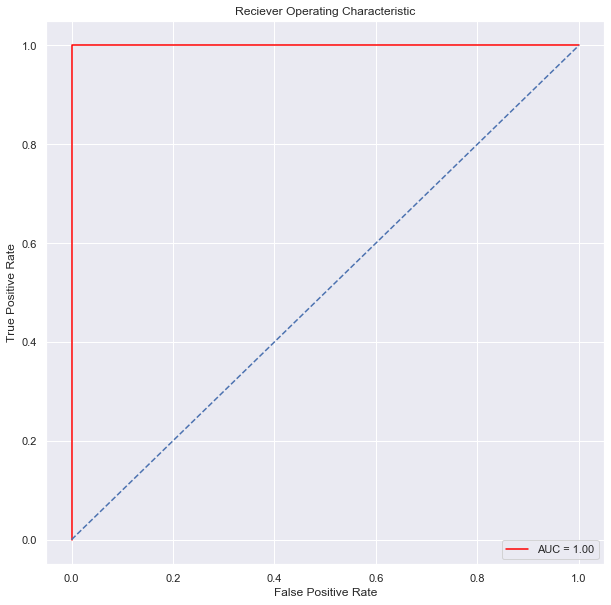

In [34]:
# We can make our own function to visualize the ROC curve:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate ,thresholds= roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)

roc_auc = auc(false_positive_rate,true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Reciever Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate,color = 'red',label ='AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plot_roc(roc_auc)